<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/AML/2348513_lAB2_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df=pd.read_csv('/content/Program_2_Dataset.csv')

In [18]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [20]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [22]:
predictors=df[['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']]

In [23]:
vif=pd.DataFrame()
vif["predictors"]=predictors.columns
vif["VIF"]=[variance_inflation_factor(predictors.values,i) for i in range(predictors.shape[1])]
print(vif)


         predictors        VIF
0        Avg_rooms   16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


From this Avg_rooms and Property_TaxRate we are not choosing  as they have higher VIF  to improve the stability of the regression model

Text(0.5, 1.0, 'Non_Retail_Acres vs Median value')

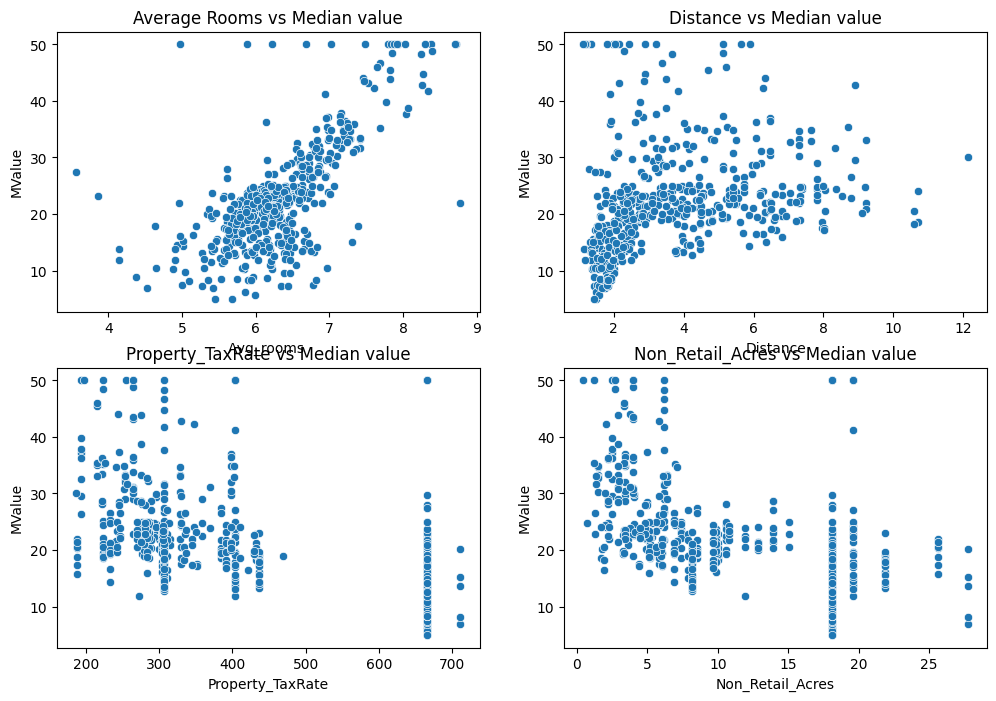

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(x='Avg_rooms ',y='MValue',data=df)
plt.title('Average Rooms vs Median value')
plt.subplot(2,2,2)
sns.scatterplot(x='Distance',y='MValue',data=df)
plt.title('Distance vs Median value')
plt.subplot(2,2,3)
sns.scatterplot(x='Property_TaxRate',y='MValue',data=df)
plt.title('Property_TaxRate vs Median value')
plt.subplot(2,2,4)
sns.scatterplot(x='Non_Retail_Acres',y='MValue',data=df)
plt.title('Non_Retail_Acres vs Median value')


In [29]:
selected_predictors=df[['Distance','Non_Retail_Acres']]
y=df['MValue']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(selected_predictors,y,test_size=0.33,random_state=42)

In [39]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (339, 2) (339,)
Testing set shape: (167, 2) (167,)


In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
train_predictions = model.predict(x_train)

In [46]:
test_predictions = model.predict(x_test)

In [47]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.27856928 -0.9452116 ]
Intercept: 38.091225709521446


The negative coefficients suggest that a negative relationship with the target variable.

In [49]:
# To Calculate the mean squared error for both train and testing sest
mseForTrain = mean_squared_error(y_train, train_predictions)
mseForTest = mean_squared_error(y_test, test_predictions)

# To Calculate the R-squared value
r2train = r2_score(y_train, train_predictions)
r2test = r2_score(y_test, test_predictions)

# To Calculate adjusted R-squared value for training set
n_train, p_train = x_train.shape
adjusted_r2_train = 1 - ((1 - r2train) * (n_train - 1) / (n_train - p_train - 1))

# To Calculate adjusted R-squared value for testing set
n_test, p_test = x_test.shape
adjusted_r2_test = 1 - ((1 - r2test) * (n_test - 1) / (n_test - p_test - 1))

In [50]:
print("MSE for Train Set: ", mseForTrain)
print("MSE for Testing Set: ", mseForTest)
print("R2 for Train: ", r2train)
print("R2 for Testing: ", r2test)
print("R2 for Train Adjusted: ", adjusted_r2_train)
print("R2 for Test Adjusted: ", adjusted_r2_test)

MSE for Train Set:  67.67782670758363
MSE for Testing Set:  55.770639488944795
R2 for Train:  0.2581499484166435
R2 for Testing:  0.20665217673469405
R2 for Train Adjusted:  0.25373417430007594
R2 for Test Adjusted:  0.19697720328023915


The MSE measures the average squared difference between the actual and predicted values. Lower values indicate better model performance. In this case, the model tends to have smaller prediction errors on the testing set compared to the training set.

R-squared is a measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the model explains about 26% of the variance in the training set and 21% in the testing set. These values are relatively low,which is limitting the performance of the model.

The adjusted R-squared values are similar to the R-squared values,the value should be higher

We can say that the model maybe underfitting as the relation between the predictor and target variable not so well captured.